In [62]:
# Data Collection and Preparation
# Data Ingestion
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
# loading train dataset
url1 = 'https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/home_loan_train.csv'
# url2 = 'https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/home_loan_test.csv'

In [64]:
data1 = pd.read_csv(url1)
# data2 = pd.read_csv(url2)

In [65]:
data1.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


From the dataset, the following observation was noted after checking out for the first 20 columns


In Dependents column,  i notice that there are strange values in this columns (e.g 3+). 


There are possible outliers in Applicantincome.


There are possible outliers in Coapplicantincome.



There are possible outlier in LoanAmount.




There are also missing values in SelfEmployed column.




In [66]:
data1.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


Observation from the tail view of the dataset

Dependent, SelfEmploy, LoanAmount has missing values in its columns



There are widely spread values in Applicant, Coapplicants and LoanAmount







In [67]:
# checking for missing values, duplicates and data type inconsistencies
data1.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [68]:
# Clean the dataset by handling missing values, correcting data type and addressing data type
# married has just 3 missing values(rows) out of 614 rows
data1[data1["Married"].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [69]:
data1.dropna(subset=["Married"], inplace=True)

From the Home Loan dataset, there are three(3) missing values in the Married row and so therefore the three rows are dropped here.

In [70]:
data1["Married"].isna().sum()

np.int64(0)

In [71]:
data1.dropna(subset=["Gender"], inplace=True)

From the Home Loan dataset, Gender column has 13 missing values therefore the missings values were dropped here

In [72]:
data1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [73]:
data1.dropna(subset=["Loan_Amount_Term"], inplace=True)

In [74]:
data1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


From the Home Loan dataset, Loan Amount Term column has 14 missing values therefore the missings values were dropped here

In [75]:
data1.dropna(subset=["Dependents"], inplace=True)

From the Home Loan dataset, Dependent colum has 15 missing values therefore the missings values were dropped here

In [76]:
data1.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        31
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           20
Loan_Amount_Term      0
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [77]:
# Filling missing numbers using mean, median or mode
data1["LoanAmount"].fillna(data1["LoanAmount"].mean())


0      146.001808
1      128.000000
2       66.000000
3      120.000000
4      141.000000
          ...    
609     71.000000
610     40.000000
611    253.000000
612    187.000000
613    133.000000
Name: LoanAmount, Length: 573, dtype: float64

In [78]:
data1.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        31
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           20
Loan_Amount_Term      0
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [79]:
data1["Self_Employed"].fillna(data1["Self_Employed"].mode()[0])
data1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [80]:
data1.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        31
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           20
Loan_Amount_Term      0
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [81]:
data1["Credit_History"].fillna(data1["Credit_History"].median())
data1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [82]:
data1.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        31
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           20
Loan_Amount_Term      0
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [83]:
data1.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Descriptive Data Analysis

In [84]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 573 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            573 non-null    object 
 1   Gender             573 non-null    object 
 2   Married            573 non-null    object 
 3   Dependents         573 non-null    object 
 4   Education          573 non-null    object 
 5   Self_Employed      542 non-null    object 
 6   ApplicantIncome    573 non-null    int64  
 7   CoapplicantIncome  573 non-null    float64
 8   LoanAmount         553 non-null    float64
 9   Loan_Amount_Term   573 non-null    float64
 10  Credit_History     524 non-null    float64
 11  Property_Area      573 non-null    object 
 12  Loan_Status        573 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.7+ KB


In [85]:
data1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,573.000000,573.000000,553.000000,573.000000,524.00000
mean,5328.514834,1641.359372,146.001808,341.675393,0.85687
std,5909.329219,3001.139055,84.052035,65.186012,0.35054
min,150.000000,0.000000,9.000000,12.000000,0.00000
25%,2876.000000,0.000000,100.000000,360.000000,1.00000
50%,3812.000000,1210.000000,128.000000,360.000000,1.00000
75%,5815.000000,2302.000000,170.000000,360.000000,1.00000
max,81000.000000,41667.000000,650.000000,480.000000,1.00000


In [86]:
data1.nunique

<bound method DataFrame.nunique of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849       

In [87]:
data1.shape

(573, 13)

## Exploratory Analysis

In [88]:

data1["LoanAmount"].fillna(data1["LoanAmount"].mean())

data1["Self_Employed"].fillna(data1["LoanAmount"].mean())
data1["Credit_History"].fillna(data1["LoanAmount"].mean())

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Credit_History, Length: 573, dtype: float64

Univariate analysis

<Axes: xlabel='LoanAmount', ylabel='Count'>

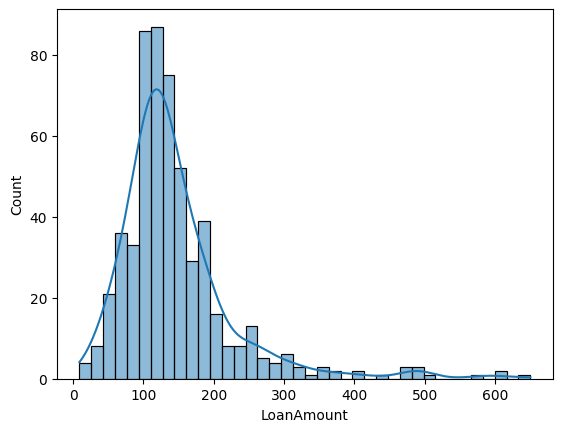

In [89]:
import seaborn as sns
sns.histplot(data1["LoanAmount"], kde=True)

<Axes: xlabel='Married', ylabel='count'>

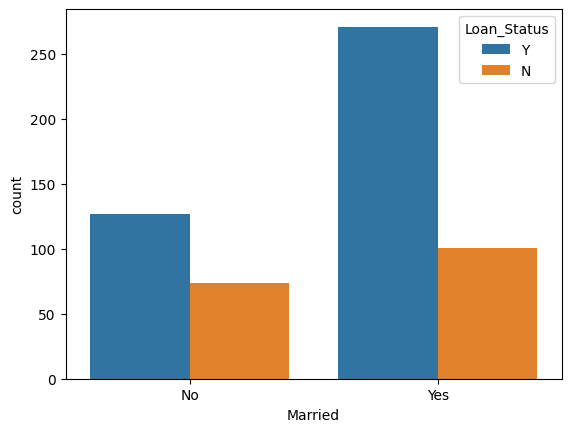

In [90]:
sns.countplot(x="Married", hue="Loan_Status", data=data1)

<Axes: xlabel='Property_Area', ylabel='count'>

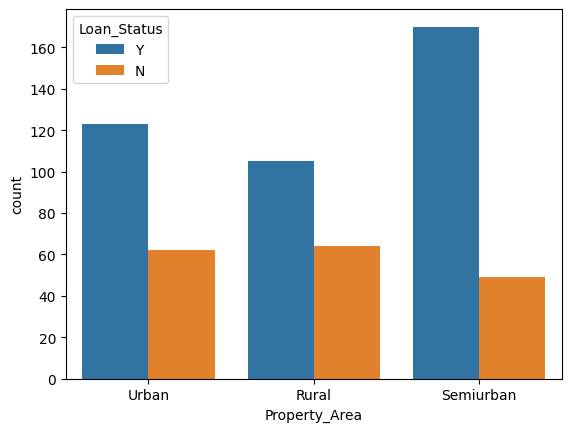

In [91]:
sns.countplot(x="Property_Area", hue="Loan_Status", data=data1)

<Axes: xlabel='Self_Employed', ylabel='count'>

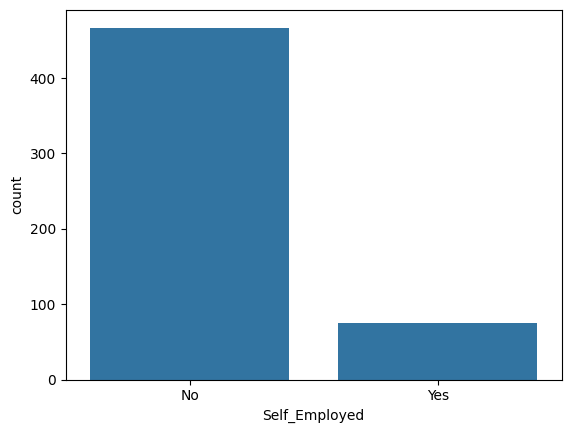

In [92]:
sns.countplot(x="Self_Employed", data=data1)

### Correlation Analysis

In [93]:
def num_univariate_analysis(data1, feature):
    skewness = data1[feature].skew()
    kurtosis = data1[feature].kurt()

    print("--"*40)
    print(f"\n Analysis for {feature}")
    print("=="*40)
    


    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data1[feature], kde=True, color="blueviolet")
    plt.title(f"\nHistplot analysis for {feature}\n")
    plt.xlabel(f"\n{feature}\n")
    plt.ylabel(f"\nFrequency\n")


    plt.subplot(1, 2, 2)
    sns.boxplot(data1[feature], color="blueviolet")
    plt.title(f"\n Boxplot for {feature}\n")
    plt.xlabel(f"\n{feature}\n")
    plt.ylabel(f"\nFrequency\n")

    plt.tight_layout()
    plt.show()


    print(f"{feature} feature skewness: {skewness:.3f}")
    print(f"{feature} feature kurtosis: {kurtosis:.3f}")

    if skewness > 1:
        print(f"{feature} values set are highly skewed")
    elif skewness > 0.5:
        print(f"{feature} values set are Moderately skewed")
    else :
        print(f"{feature} values set are Slightly skewed\n")

--------------------------------------------------------------------------------

 Analysis for ApplicantIncome


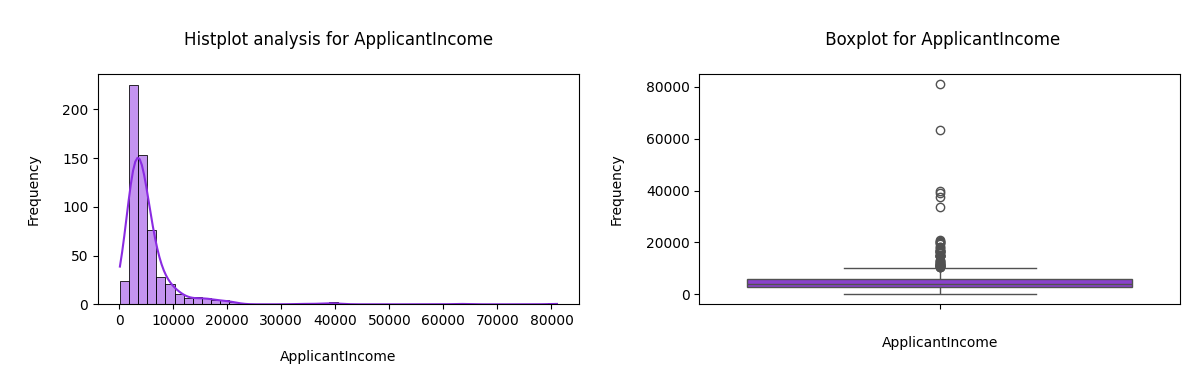

ApplicantIncome feature skewness: 6.868
ApplicantIncome feature kurtosis: 68.292
ApplicantIncome values set are highly skewed
--------------------------------------------------------------------------------

 Analysis for CoapplicantIncome


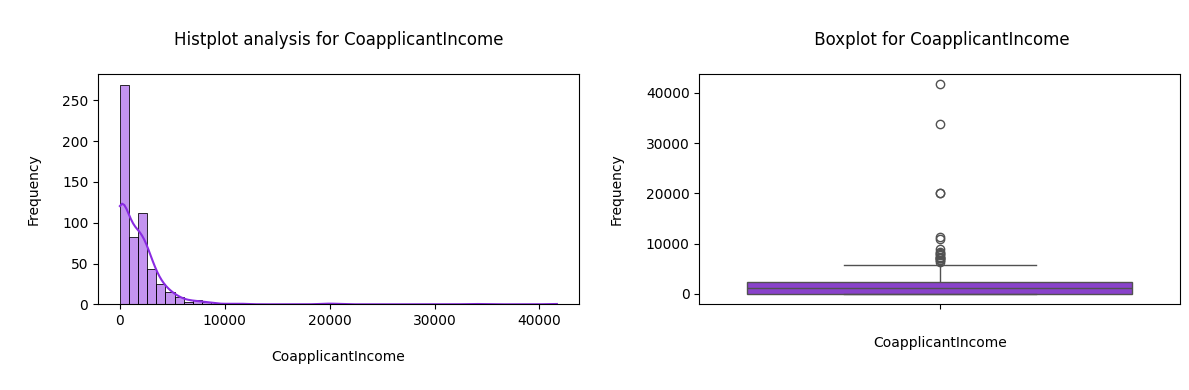

CoapplicantIncome feature skewness: 7.421
CoapplicantIncome feature kurtosis: 82.046
CoapplicantIncome values set are highly skewed
--------------------------------------------------------------------------------

 Analysis for LoanAmount


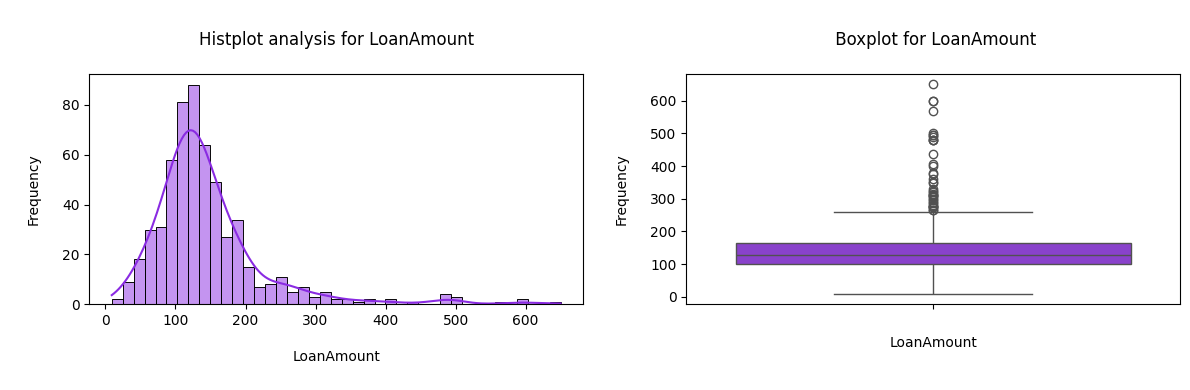

LoanAmount feature skewness: 2.531
LoanAmount feature kurtosis: 9.355
LoanAmount values set are highly skewed
--------------------------------------------------------------------------------

 Analysis for Loan_Amount_Term


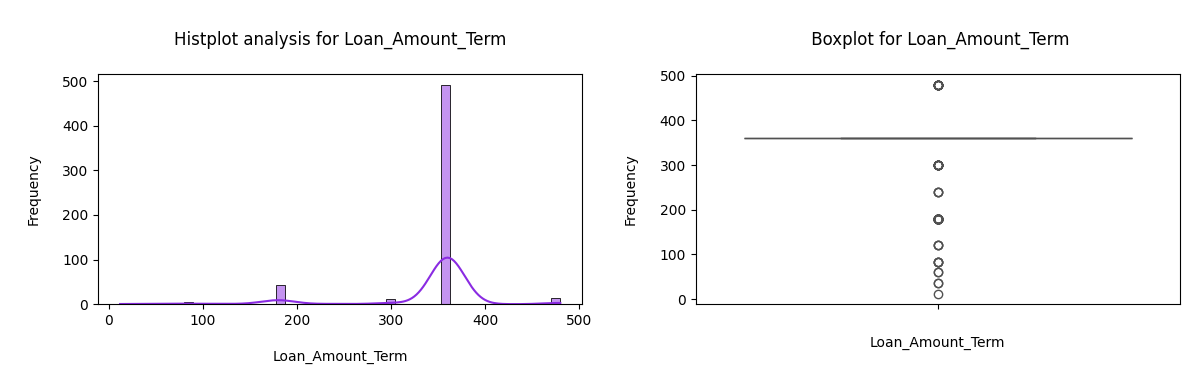

Loan_Amount_Term feature skewness: -2.425
Loan_Amount_Term feature kurtosis: 6.828
Loan_Amount_Term values set are Slightly skewed

--------------------------------------------------------------------------------

 Analysis for Credit_History


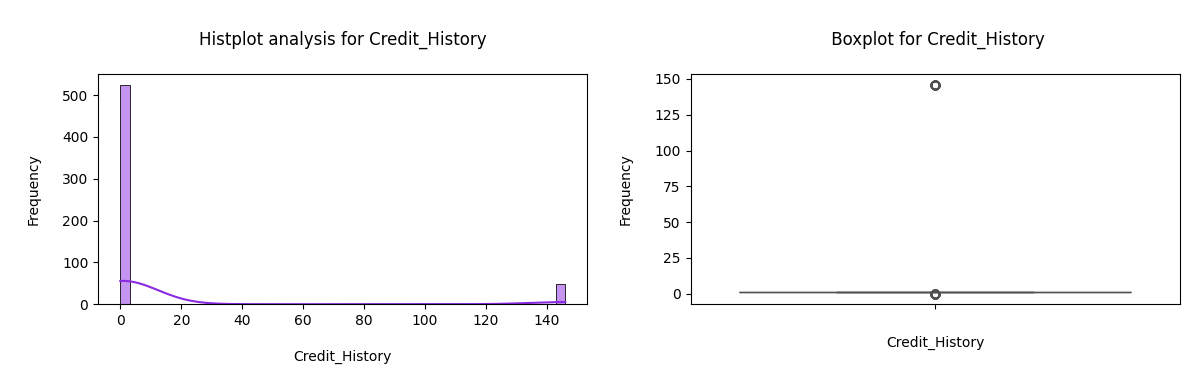

Credit_History feature skewness: 2.972
Credit_History feature kurtosis: 6.856
Credit_History values set are highly skewed


In [94]:

for feature in num_features:
    num_univariate_analysis(num_features, feature)

In [107]:
cat_features= data1.select_dtypes(include='object')

In [110]:
data1.Self_Employed.unique()

array(['No', 'Yes', nan], dtype=object)

In [108]:
def categorical_univariate_analysis(data1, feature):
    

    print("--"*40)
    print(f"\n Analysis for {feature}")
    print("=="*40)
    
    

    plt.figure(figsize=(8, 4))
    sns.countplot(x="Self_Employed", data1=data1, color="blueviolet")
    plt.title(f"\nCountplot for {feature}\n")
    plt.xlabel(f"\n{feature}\n")
    plt.ylabel(f"\nFrequency\n")

    plt.tight_layout()
    plt.show()

In [109]:
for feature in cat_features:
    categorical_univariate_analysis(data1, feature)

--------------------------------------------------------------------------------

 Analysis for Loan_ID


ValueError: Could not interpret value `Self_Employed` for `x`. Value is a string, but `data` was not passed.

<Figure size 800x400 with 0 Axes>

Bivariate Analysis

<Axes: xlabel='Education', ylabel='count'>

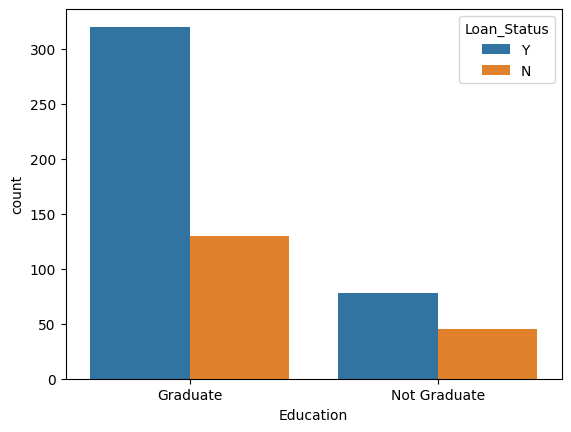

In [ ]:
sns.countplot(x="Education", hue="Loan_Status", data=data1)

<Axes: xlabel='Gender', ylabel='count'>

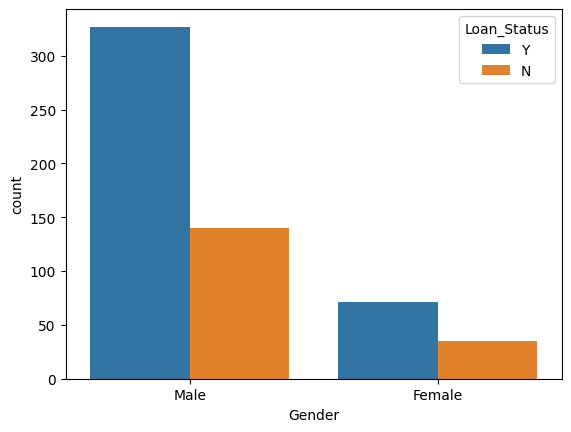

In [ ]:
sns.countplot(x="Gender", hue="Loan_Status", data=data1)

<Axes: xlabel='Credit_History', ylabel='count'>

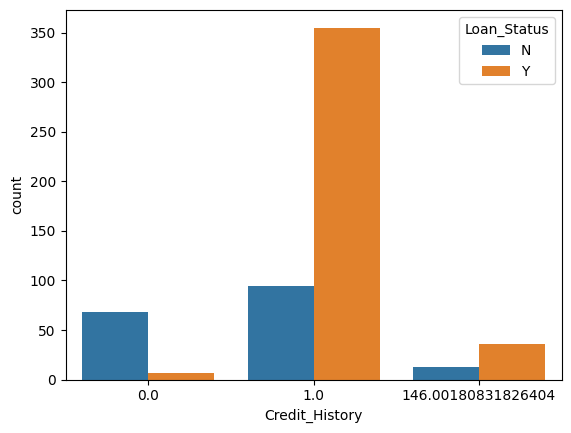

In [ ]:
sns.countplot(x="Credit_History", hue="Loan_Status", data=data1)

<Axes: xlabel='Credit_History', ylabel='count'>

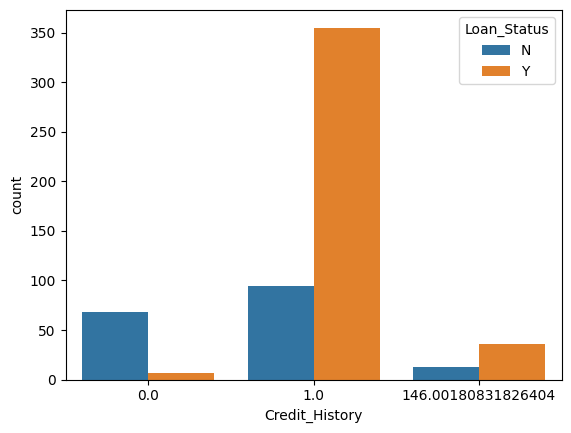

In [ ]:
sns.countplot(x="Credit_History", hue="Loan_Status", data=data1)

In [ ]:
# lets find the numerical features
num_features = data1.select_dtypes(['number']).columns
num_features

num_features = pd.DataFrame(data1[num_features])
num_features.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,146.001808,360.0,1.0
1,4583,1508.0,128.000000,360.0,1.0


Numeric to Numeric

Correlation with Each  Columns

In [ ]:
def correlation_with_target(data1, target_col, figsize=(10,2)):
    """
    Plots a heatmap showing correlation of each numeric feature against target_col.
    Returns a series of correlations (sorted by absolute magnitude).
    """
    # Keep only numeric columns
    numeric_df = data1.select_dtypes(include='number').copy()
    if target_col not in numeric_df.columns:
        raise ValueError(f"Target column '{target_col}' must be numeric and present in the dataframe.")

    # compute correlations of every numeric column with the target
    corrs = numeric_df.corrwith(numeric_df[target_col]).drop(target_col)

    corrs_df = corrs.to_frame(name='corr').T  # shape (1, n)

    plt.figure(figsize=figsize)
    sns.heatmap(
        corrs_df,
        annot=True,
        fmt=".3f",
        cmap="coolwarm",
        center=0,
        vmin=-1,
        vmax=1,
        cbar_kws={'orientation': 'vertical', 'shrink':0.7}
    )
    plt.xticks(rotation=45, ha='right')
    plt.yticks([0], [target_col], rotation=0)
    plt.title(f'Correlation of numeric features with {target_col}', fontsize=12)
    plt.tight_layout()
    plt.show()

    # return sorted correlations for downstream use
    return corrs.reindex(corrs.abs().sort_values(ascending=False).index)


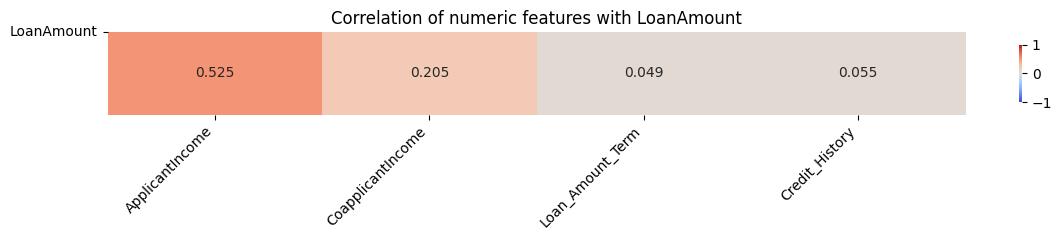

ApplicantIncome      0.525325
CoapplicantIncome    0.205021
Credit_History       0.054577
Loan_Amount_Term     0.048743
dtype: float64


In [ ]:
corr_series = correlation_with_target(data1, 'LoanAmount', figsize=(12,2.5))
print(corr_series) 

In [ ]:
from scipy.stats import pearsonr

def numeric_bivariate_plot(df, x_col, y_col):
    """
    Plots the relationship between two numeric variables with a regression line
    and displays the correlation coefficient.

    Parameters:
    -----------
    df : pandas.DataFrame
        Dataset containing the numeric columns
    x_col : str
        Name of the first numeric variable (x-axis)
    y_col : str
        Name of the second numeric variable (y-axis)
    """

    # Calculate correlation coefficient
    corr, p_value = pearsonr(df[x_col], df[y_col])

    # Create plot
    plt.figure(figsize=(8, 5))
    sns.regplot(data=df, x=x_col, y=y_col, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    
    # Title and labels
    plt.title(f"{y_col} vs {x_col}\nCorrelation: {corr:.3f} (p={p_value:.3f})", fontsize=13)
    plt.xlabel(x_col, fontsize=11)
    plt.ylabel(y_col, fontsize=11)
    plt.grid(alpha=0.3)
    plt.show()


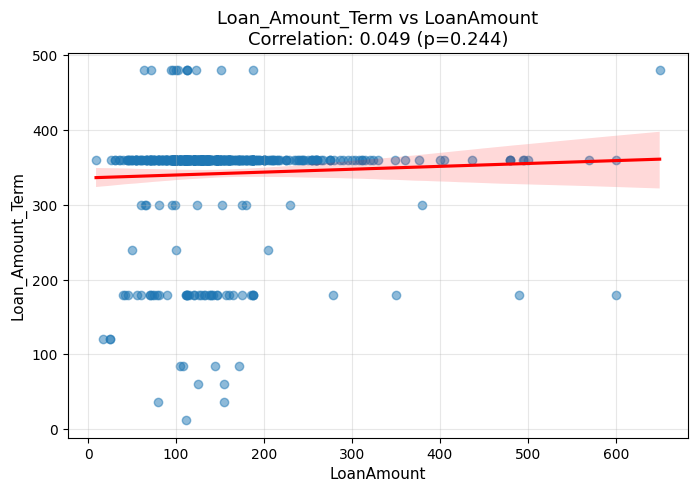

In [ ]:
numeric_bivariate_plot(data1, 'LoanAmount', 'Loan_Amount_Term')
